24040208007

Sumiran Rai

MDSC-302(P): Deep Learning Lab

Assignment-III

Exercise

Take several pictures of red, blue, and green items with your phone or other dig
ital camera (or download some from the internet, if a camera isn’t available).

 1. Load each image, and convert it to a tensor.

 2.  For each image tensor, use the .mean() method to get a sense of how bright
 the image is.

 3. Take the mean of each channel of your images. Can you identify the red,
 green, and blue items from only the channel averages?

In [29]:
import torch
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

# Helper function to load image from URL or local file
def load_image(path_or_url):
    if path_or_url.startswith("http"):
        response = requests.get(path_or_url)
        img = Image.open(BytesIO(response.content)).convert("RGB")
    else:
        img = Image.open(path_or_url).convert("RGB")
    return img

In [30]:
image_paths = [
    "/content/Map of Biology.png",
    "/content/Map of Chemistry.png",
    "/content/Map of Computer Science.png",
]

image_tensors = []

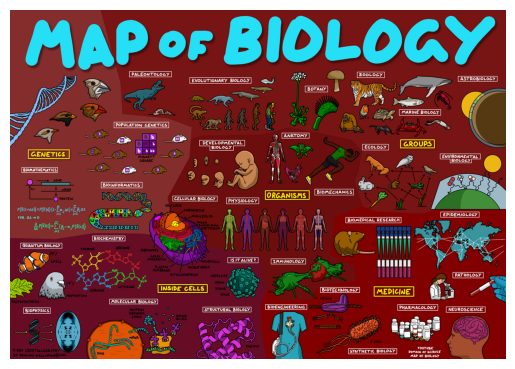

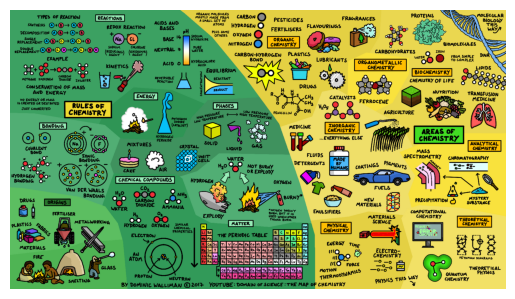

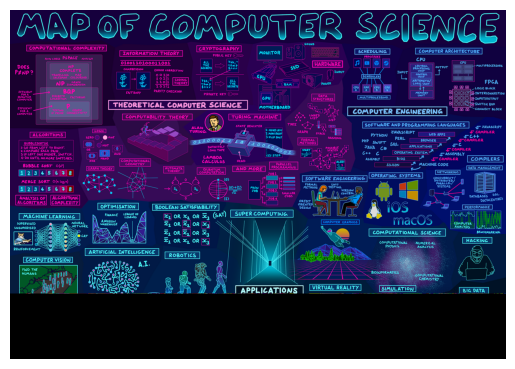

In [37]:
from PIL import Image, ImageFile
import torch
import matplotlib.pyplot as plt
import numpy as np

# Allow truncated/corrupted images to load
ImageFile.LOAD_TRUNCATED_IMAGES = True

def load_image(path):
    img = Image.open(path).convert("RGB")  # ensure RGB
    return img

image_tensors = []

for path in image_paths:
    try:
        # Load image safely
        img = load_image(path)

        # Show image
        plt.imshow(img)
        plt.axis("off")
        plt.show()

        # Convert PIL -> numpy -> torch tensor [C, H, W], values in [0,1]
        np_img = np.array(img)  # shape [H, W, C], uint8
        tensor = torch.from_numpy(np_img).permute(2, 0, 1).float() / 255.0
        image_tensors.append(tensor)

    except Exception as e:
        print(f"Error loading {path}: {e}")


In [35]:
# Step b: Brightness (overall mean across all pixels & channels)
for idx, tensor in enumerate(image_tensors):
    brightness = tensor.mean().item()
    print(f"Image {idx+1} Brightness: {brightness:.4f}")

Image 1 Brightness: 0.2817
Image 2 Brightness: 0.4691
Image 3 Brightness: 0.1875


In [36]:
# Step c: Mean of each channel
for idx, tensor in enumerate(image_tensors):
    channel_means = tensor.mean(dim=(1, 2))  # [R_mean, G_mean, B_mean]
    print(f"Image {idx+1} Channel Means: R={channel_means[0]:.4f}, G={channel_means[1]:.4f}, B={channel_means[2]:.4f}")


Image 1 Channel Means: R=0.4269, G=0.2089, B=0.2094
Image 2 Channel Means: R=0.4860, G=0.6077, B=0.3137
Image 3 Channel Means: R=0.1272, G=0.1209, B=0.3144
